# Shopify Summer Intern Data Science Challenge

## Date: 6th Jan 2022
## Submission by: Prakriti Ailavadi
#### Master of Management Analytics Student, Rotman School of Management, University of Toronto
<br><br>

# Question 1: 
<br><b>
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 
<br><br>
1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. <br>
2. What metric would you report for this dataset? <br>
3. What is its value? <br></b>
<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Data_Science_Intern_Challenge.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### Basic Descriptive Stats

In [4]:
df.shape

(5000, 7)

In [6]:
df['shop_id'].nunique()

100

In [8]:
df['created_at'].describe()

count                   5000
unique                  4991
top       2017-03-28 4:00:00
freq                       3
Name: created_at, dtype: object

In [11]:
df['shop_id'].value_counts()

53    68
71    66
19    64
13    63
89    61
      ..
74    38
56    37
67    37
38    35
85    35
Name: shop_id, Length: 100, dtype: int64

In [12]:
min(df['created_at'])

'2017-03-01 0:08:09'

In [13]:
max(df['created_at'])

'2017-03-30 9:55:00'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


<b>Clearly the error in the calculation is that the order amount column is just averaged over the 30 day period without considering the variation in the items ordered. This is misleading since if the quantity ordered is more, naturally the order_amount will be more. 

<br><b>Thus, <br>Average order value = Total Order Amount over 30 days/ Total number of items purchased over 30 days <br>
This can be done:
1. Overall
2. Shop wise </b>

### Overall

In [14]:
sum(df['order_amount'])/sum(df['total_items'])

357.92152221412965

<b>The overall AOV is $ 357.92 </b>

### Store wise

In [83]:
df_grouped = df.groupby('shop_id')[['order_amount', 'total_items']].sum()
df_grouped['AOV'] = df_grouped['order_amount']/df_grouped['total_items']
df_grouped.head()

,order_amount,total_items,AOV
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0


In [84]:
print("Maximum Store wise AOV: ", max(df_grouped['AOV']))
print("Maximum Store wise AOV: ", min(df_grouped['AOV']))

Maximum Store wise AOV:  25725.0
Maximum Store wise AOV:  90.0


In [9]:
print("Maximum order amount: ", max(df['order_amount']))
print("Minimum order amount: ", min(df['order_amount']))

Maximum order amount:  704000
Minimum order amount:  90


In [85]:
df_grouped['AOV'].mean()

407.99

In [11]:
df_grouped.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', name='shop_id')

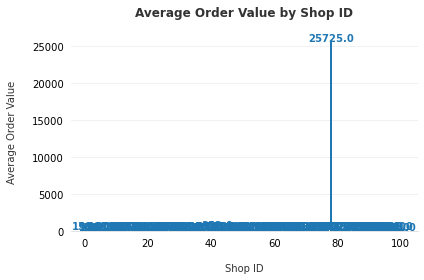

In [15]:
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=df_grouped.index,
    height=df_grouped['AOV']
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Shop ID', labelpad=15, color='#333333')
ax.set_ylabel('Average Order Value', labelpad=15, color='#333333')
ax.set_title('Average Order Value by Shop ID', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()

In [6]:
# Analyzing which store has such high AOV
df_grouped[df_grouped['AOV'] == max(df_grouped['AOV'])]

,order_amount,total_items,AOV
shop_id,,,
78,2263800,88,25725.0


In [8]:
df[df['shop_id'] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


<b> Thus more data on store 78 clearly needs to be investigated for any data errors or fradulent transactions since the AOV and order amount is pretty high 

<b>Quick analysis of the rest of the stores

<Figure size 1600x800 with 0 Axes>

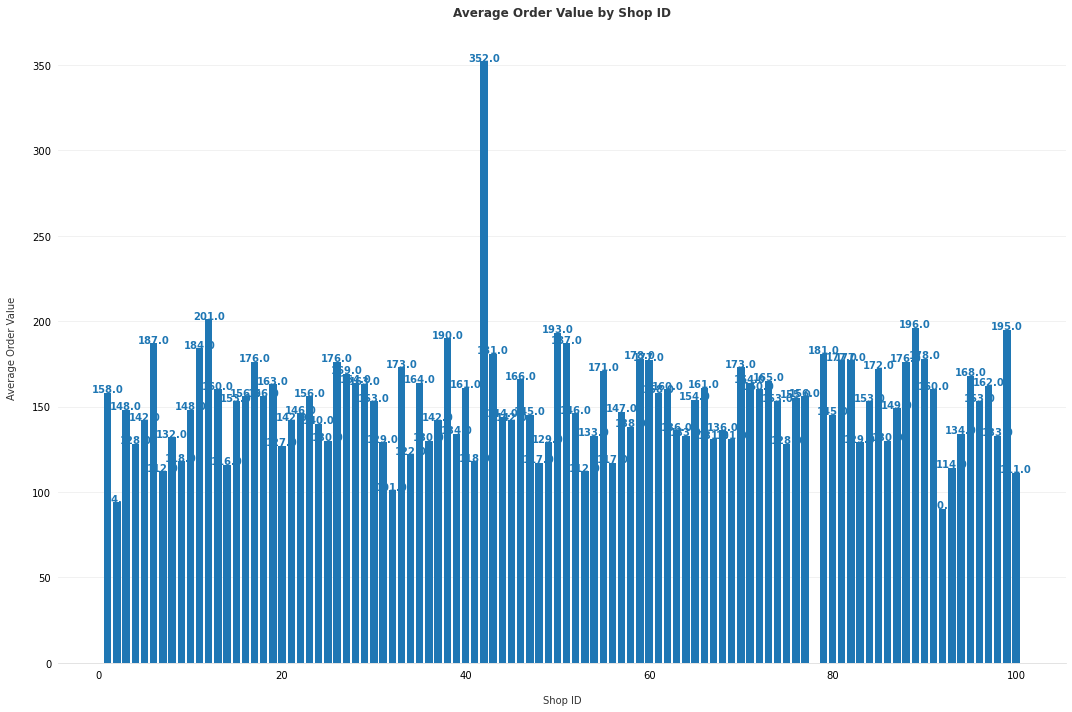

In [29]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)
df_grouped_cleaned = df_grouped[df_grouped['AOV'] != max(df_grouped['AOV'])]

fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(
    x=df_grouped_cleaned.index,
    height=df_grouped_cleaned['AOV']
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Shop ID', labelpad=15, color='#333333')
ax.set_ylabel('Average Order Value', labelpad=15, color='#333333')
ax.set_title('Average Order Value by Shop ID', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()

In [30]:
# Average Order Value after excluding shop 78
df_cleaned = df[df['shop_id'] != 78]
sum(df_cleaned['order_amount'])/sum(df_cleaned['total_items'])

307.01149425287355

In [31]:
# AOV per shop
df_grouped_cleaned['AOV'].mean()

152.26262626262627

<br>

## A median or mode order value might be a better way to evaluate the data

a. Take the median/mode of AOV

In [39]:
df_grouped = df.groupby('shop_id')[['order_amount']].sum()
df_grouped['total_items'] = df.groupby('shop_id')[['total_items']].sum()
df_grouped['AOV'] = df_grouped['order_amount']/df_grouped['total_items']

In [41]:
df_grouped.head()

,order_amount,total_items,AOV
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0


In [44]:
df_grouped['AOV'].median()

153.0

In [46]:
df_grouped['AOV'].mode()

0    153.0
dtype: float64

<b> Thus we can report median or mode AOV value store wise to be $153 for sneakers.

2. Median Order Value: This helps us get rid of outliers from the very start

In [48]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [49]:
df['order_amount_per_item'] = df['order_amount']/df['total_items']
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [50]:
df['order_amount_per_item'].median()

153.0

<b> Thus the second approach is simple and much reliable.

<br>

## Better Analysis -  Customer Value and Date Analysis

Average Order Value purchased by customer

In [51]:
print("Number of Users: ", df['user_id'].nunique())

Number of Users:  301


In [72]:
df_grouped = df.groupby('user_id')[['order_amount', 'total_items']].sum()
df_grouped['Average Order Value per Customer'] = df_grouped['order_amount']/df_grouped['total_items']
df_grouped.sort_values(by=['Average Order Value per Customer'], ascending=False).head()

,order_amount,total_items,Average Order Value per Customer
user_id,,,
878,156936,24,6539.000000
766,80076,23,3481.565217
962,80408,24,3350.333333
855,80915,27,2996.851852
775,81114,28,2896.928571


{'whiskers': [<matplotlib.lines.Line2D at 0x7f67755a6160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6775159310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f67755a6400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6775159700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6775159c70>],
 'means': []}

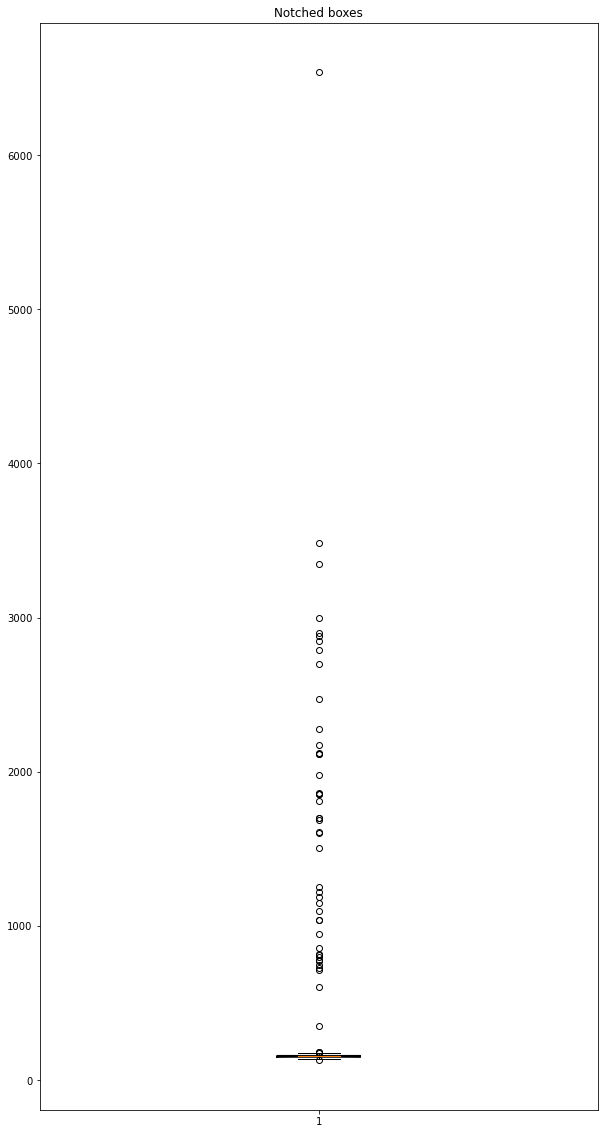

In [63]:
data = df_grouped['Average Order Value per Customer']
fig, ax = plt.subplots(figsize=(10,20))
ax.set_title('Notched boxes')
ax.boxplot(data, notch=True)

<b> Clearly we have some outliers for Average Order Value with the customers as well

In [73]:
df_grouped.sort_values(by=['Average Order Value per Customer'], ascending=False).head(1)

,order_amount,total_items,Average Order Value per Customer
user_id,,,
878,156936,24,6539.0


In [74]:
df[df['user_id'] == 878]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_per_item
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
818,819,60,878,354,2,debit,2017-03-27 12:42:01,177.0
927,928,2,878,94,1,credit_card,2017-03-10 18:09:05,94.0
1575,1576,47,878,290,2,cash,2017-03-07 22:06:51,145.0
1833,1834,74,878,153,1,credit_card,2017-03-06 17:33:21,153.0
2011,2012,87,878,298,2,cash,2017-03-04 14:14:35,149.0
3474,3475,20,878,254,2,cash,2017-03-17 3:43:03,127.0
3647,3648,98,878,266,2,cash,2017-03-06 1:49:57,133.0
4106,4107,26,878,176,1,debit,2017-03-20 4:32:18,176.0
4215,4216,80,878,435,3,debit,2017-03-05 3:07:32,145.0


<b> Thus we observe that while other users also purchased 1-3 sneakers from store 78 in the 30 day period, user 878 purchased the maximum number (6) sneakers from store 78 resulting in a very high order amount of $154350. This transaction is definitely suspicious and needs further investigation. 

## Using Median

In [77]:
df_grouped = df.groupby('user_id')[['order_amount']].median()
df_grouped['total_items'] = df.groupby('user_id')[['total_items']].median()
df_grouped['Median Order Value'] = df_grouped['order_amount']/df_grouped['total_items']
df_grouped.sort_values(by=['Median Order Value'], ascending=False).head()

,order_amount,total_items,Median Order Value
user_id,,,
607,704000.0,2000.0,352.000000
946,258.0,1.0,258.000000
770,242.0,1.0,242.000000
792,218.5,1.0,218.500000
866,308.0,1.5,205.333333


In [79]:
df_grouped['Median Order Value'].median()

149.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f677539e2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f677539efa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f677539ed00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6774ccc940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6774ef94f0>],
 'means': []}

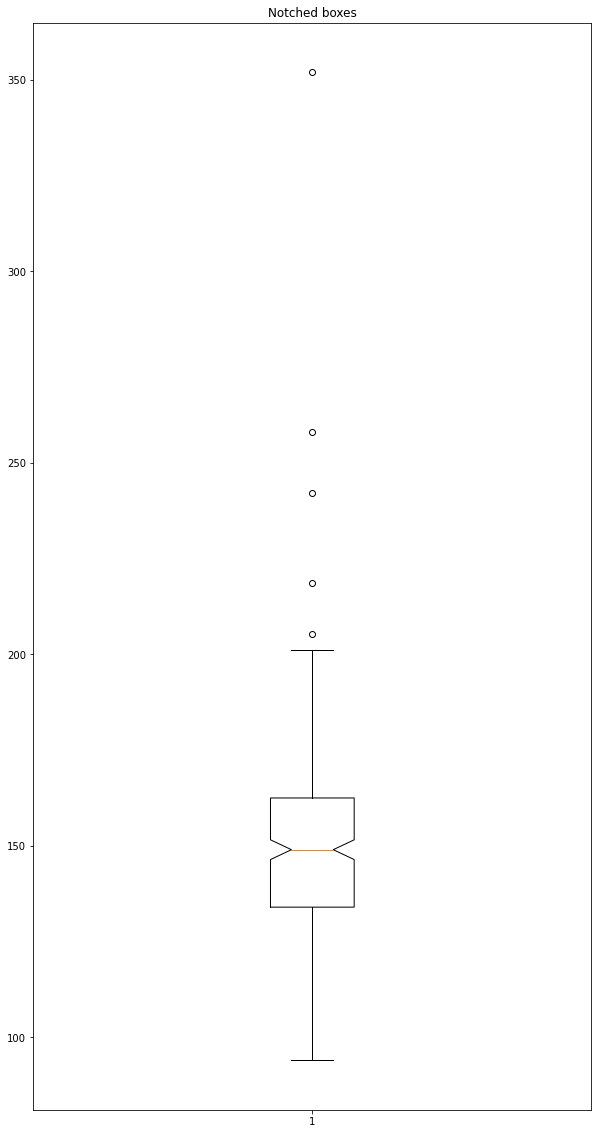

In [80]:
data = df_grouped['Median Order Value']
fig, ax = plt.subplots(figsize=(10,20))
ax.set_title('Notched boxes')
ax.boxplot(data, notch=True)

<b> The use of Median gives us another discovery of user_id 607 with the highest order amount of 70400

In [42]:
df[df['user_id'] == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


<b>This shop 42 and user id 607 clearly looks suspicious since they have way too many orders (2000) per order and the order amount is also the highest. There are also orders made on the same date. This might be a data error or fraudulent transaction.

## Date wise analysis

In [81]:
df['date_time'] = pd.to_datetime(df['created_at'])
df['date'] = [d.date() for d in df["date_time"]]

In [82]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_per_item,date_time,date
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,2017-03-13 12:36:56,2017-03-13
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,2017-03-03 17:38:52,2017-03-03
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0,2017-03-14 04:23:56,2017-03-14
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,2017-03-26 12:43:37,2017-03-26
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0,2017-03-01 04:35:11,2017-03-01


In [51]:
df_grouped = df.groupby('date')[['order_amount']].sum()

In [57]:
df_grouped.index

Index([2017-03-01, 2017-03-02, 2017-03-03, 2017-03-04, 2017-03-05, 2017-03-06,
       2017-03-07, 2017-03-08, 2017-03-09, 2017-03-10, 2017-03-11, 2017-03-12,
       2017-03-13, 2017-03-14, 2017-03-15, 2017-03-16, 2017-03-17, 2017-03-18,
       2017-03-19, 2017-03-20, 2017-03-21, 2017-03-22, 2017-03-23, 2017-03-24,
       2017-03-25, 2017-03-26, 2017-03-27, 2017-03-28, 2017-03-29, 2017-03-30],
      dtype='object', name='date')

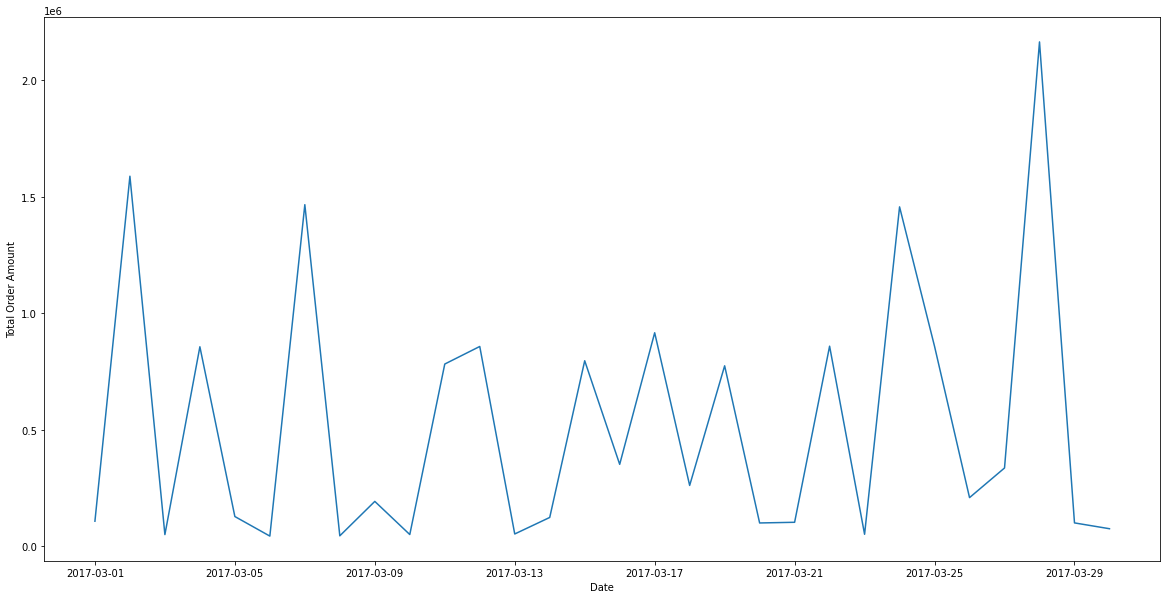

In [61]:
import matplotlib.pyplot as plt

x = df_grouped.index
y = df_grouped['order_amount']

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Date')
ax.set_ylabel('Total Order Amount')
plt.plot(x, y)
plt.show()

<b> Since it is just a 30 day period it is hard to say about trends. More data for months need to be collected for each shop to understand patterns and comment on sneaker sales. 

## Conclusion

<b> 1a. </b><br>
The sales for sneaker sales calculated in the question had a major error of not taking total items into account. When we considered total items and calculate the average order value it comes out to be $357.92 which is still pretty high. <br>
So, we can dig deeper and find outliers shop and customer wise. This gives us opportunity to explore the errors in our database and analyze sales.
<br><br>

<b> 1b. </b><br>
A better method to measure the sales would be median order value since median calculation is not affected by outliers and gives us a more realistic measure of an overall picture.
<br><br>

<b> 1c. </b><br>
The median order value is $153. 

<br>

# Question 2
<b><br>
Please use queries to answer the following questions. Paste your queries along with your final numerical answers below. <br>

1. How many orders were shipped by Speedy Express in total? <br>
2. What is the last name of the employee with the most orders? <br>
3. What product was ordered the most by customers in Germany? <br>
</b>

## Solutions

<b> 1. How many orders were shipped by Speedy Express in total?

In [ ]:
# Counting Orders of the fetched ShipperID
SELECT COUNT(OrderID) FROM Orders
WHERE ShipperID IN 
(
    # Getting ShipperID of Speedy Express
    SELECT ShipperID 
    FROM Shippers 
    WHERE ShipperName = 'Speedy Express'
);

Output:

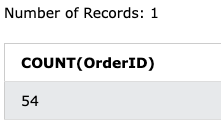

<b>Ans: 54</b>
<br><br><br><br>

<b>2. What is the last name of the employee with the most orders?

In [ ]:
# Getting Last Name of the subsetted employee
SELECT LastName
FROM Employees
WHERE EmployeeID IN 
(
    # Getting EmployeeID of Employee with most orders
    SELECT EmployeeID
    FROM Orders
    GROUP BY EmployeeID 
    ORDER BY COUNT(OrderID) DESC
    LIMIT 1
);

Output

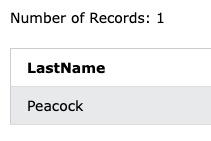

In [ ]:
## To get the num_orders of the employee with most orders with the name, we can use join instead of subquery

# Common Table Expression for fetching Employee ID and number of orders
With temp_cte as 
(
    SELECT EmployeeID, COUNT(OrderID) as num_orders 
    FROM Orders
    GROUP BY EmployeeID
)
# Fetching all details from the join of CTE and Employees table for Employee having most orders
SELECT e.EmployeeID, FirstName, LastName, num_orders
FROM Employees e LEFT JOIN temp_cte tc 
ON e.EmployeeID = tc.EmployeeID
ORDER BY num_orders DESC
LIMIT 1;

Output

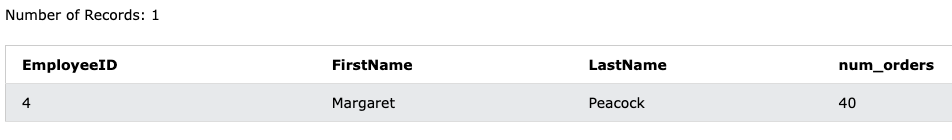

<b>Ans: Peacock</b>
<br><br><br><br>

<b>What product was ordered the most by customers in Germany?

In [ ]:
# Getting Product Name and quantity by combining four tables Orders, Order Details, Customers, Products
# For Country Germany and for Product that was most ordered there
SELECT p.ProductID, ProductName, SUM(Quantity) AS net_qty
FROM Orders o, OrderDetails od, Customers c, Products p
WHERE Country = "Germany" 
AND o.OrderID = od.OrderID 
AND o.CustomerID = c.CustomerID 
AND od.ProductID = p.ProductID
GROUP BY p.ProductID
ORDER BY SUM(Quantity) DESC
LIMIT 1;

Output:

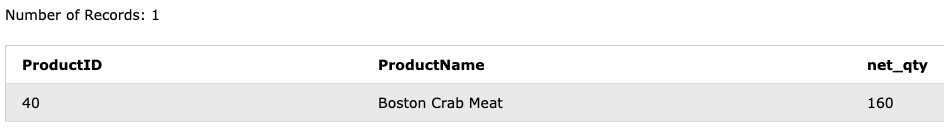

<b>Ans: <br>Product ID 40 <br>Product Name: Boston Crab Meat <br>with net order quanity 160</b>
<br><br><br><br>

## END OF SUBMISSION